# Context

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df.head(7)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663


In [5]:
# feature names as a list
col = df.columns
print(col)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
df.describe

<bound method NDFrame.describe of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after

In [7]:
df.shape

(6819, 96)

In [8]:
# finding null values
print(df.isnull().values.any())

False


In [9]:
# get the number of missing data points per column
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print(total_missing_value / total_cells * 100)
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)
######### 2 üsulla göstərmək istədim.

Series([], dtype: int64)
0.0
Total number of our cells is : 654624
Total number of our missing value is : 0


In [10]:
#using a supervised machine learning models, correlation and variations to judge the importance of each feature, and keeps only the most important ones
#Filter by variation
var=df.var()
print(var)

Bankrupt?                                                   0.031226
 ROA(C) before interest and depreciation before interest    0.003683
 ROA(A) before interest and % after tax                     0.004306
 ROA(B) before interest and depreciation after tax          0.003794
 Operating Gross Margin                                     0.000287
                                                              ...   
 Liability to Equity                                        0.000209
 Degree of Financial Leverage (DFL)                         0.000245
 Interest Coverage Ratio (Interest expense to EBIT)         0.000175
 Net Income Flag                                            0.000000
 Equity to Liability                                        0.002501
Length: 96, dtype: float64


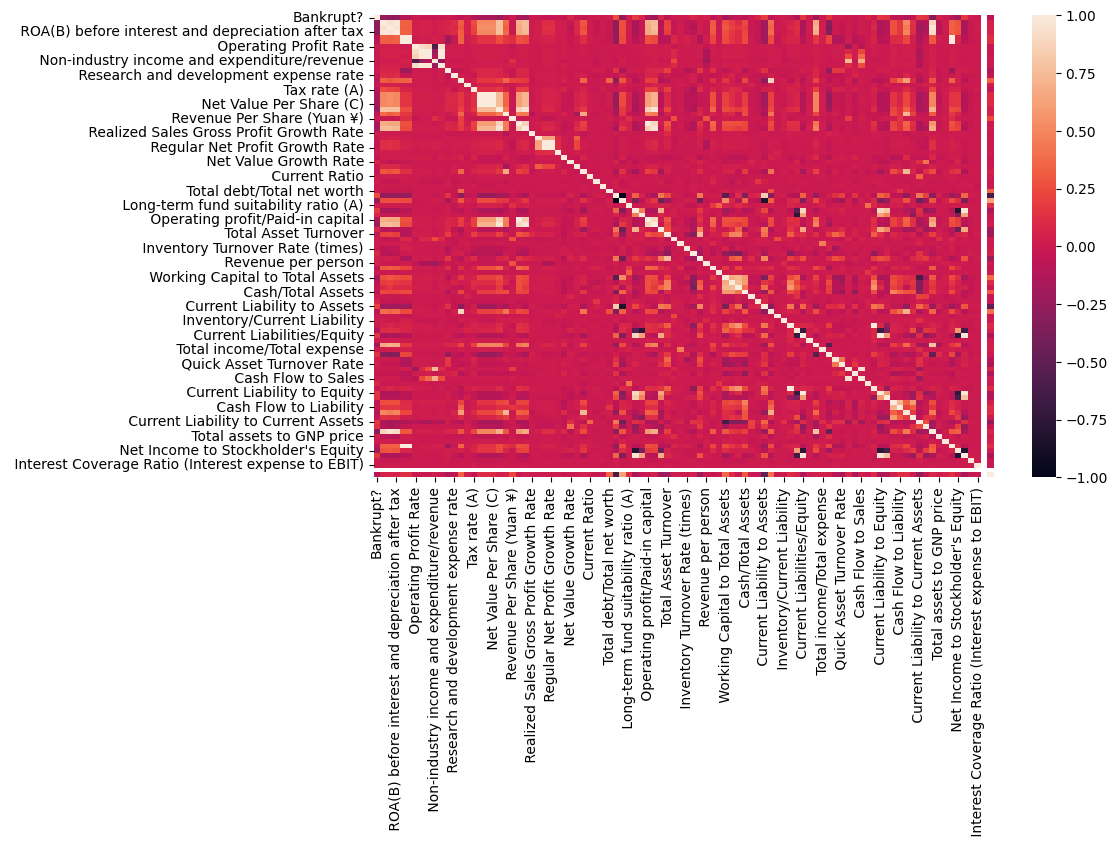

In [11]:
fig_dimns=(10,6)
fig, ax= plt.subplots(figsize=fig_dimns)
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [12]:
# Separate features (X) and labels (y)
X = df.drop('Bankrupt?', axis=1)  # The drop method is used to remove a specified column ('Bankrupt?') from the DataFrame.
#The axis=1 parameter indicates that we are dropping a column
y = df['Bankrupt?']
# This separation is often done to prepare the data for training a model,
#where X is used to train the model, and y is used to evaluate its performance.

In [13]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [15]:
clsf=RandomForestClassifier(n_estimators=100,random_state=0)
clsf.fit(X_train, y_train)

<ipython-input-15-349a1ab2ee5c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clsf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [16]:
y_pred = clsf.predict(X_test)
#obtain predictions

In [17]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.970


In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.43      0.15      0.23        59

    accuracy                           0.97      2046
   macro avg       0.70      0.57      0.60      2046
weighted avg       0.96      0.97      0.96      2046



In [19]:
from sklearn.metrics import confusion_matrix

<Axes: >

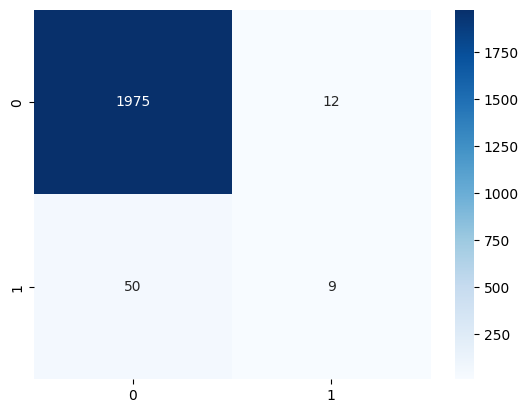

In [20]:
cm = confusion_matrix(y_test,clsf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="",cmap='Blues')

DESCRIPTIVE ANALYSIS

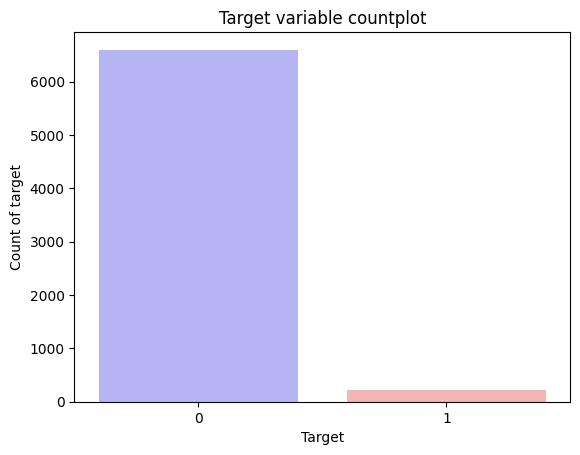

Bankrupt?
0    6599
1     220
dtype: int64

In [22]:
#analyzing target variable
sns.countplot(data=df, x='Bankrupt?', palette='bwr',)
plt.xlabel('Target')
plt.ylabel('Count of target')
plt.title('Target variable countplot')
plt.show()

df.groupby('Bankrupt?').size()

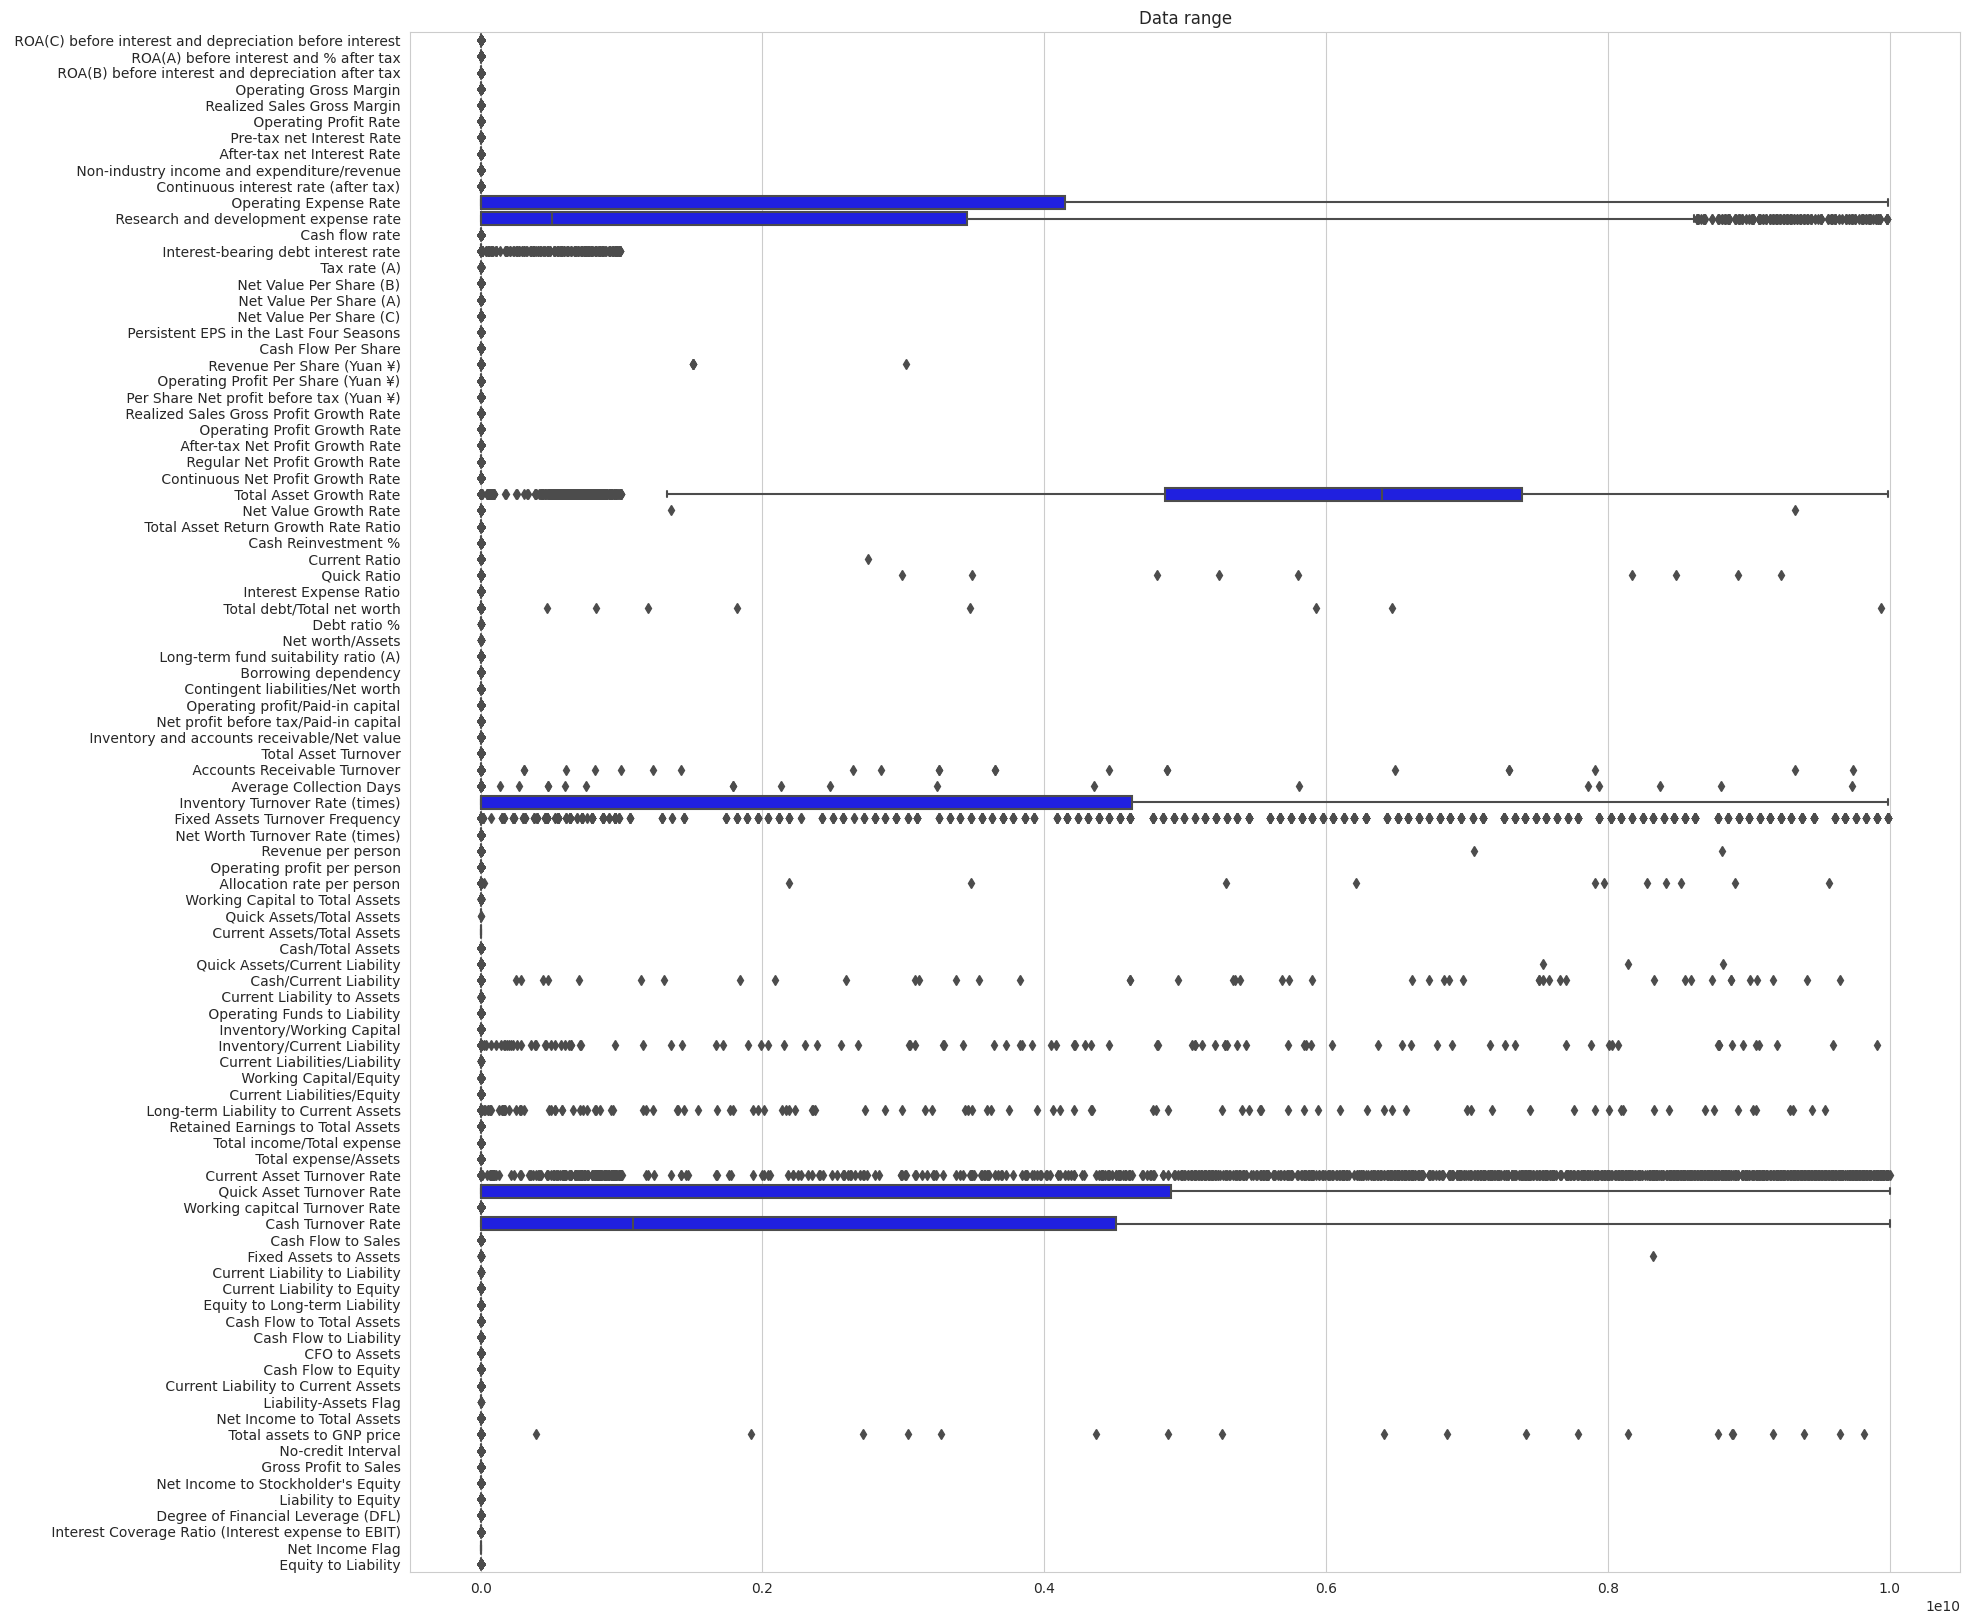

In [23]:
# for seeing data ranges for understanding data and finding outliers of data
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.set_palette('bwr')
sns.boxplot(data = df.drop(['Bankrupt?'], axis=1), orient='h', color='blue')
plt.title('Data range')
plt.show()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print("Financially Stable:", round(df['Bankrupt?'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print("Financially Unstable:", round(df['Bankrupt?'].value_counts()[1] / len(df) * 100,2),'% of the dataset')

X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

sss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for train_index, test_index in sss.split(X,y):
    print("\n Train", train_index, "Test", test_index)
    org_Xtrain, org_Xtest = X.iloc[train_index], X.iloc[test_index]
    org_ytrain, org_ytest = y.iloc[train_index], y.iloc[test_index]

Financially Stable: 96.77 % of the dataset
Financially Unstable: 3.23 % of the dataset

 Train [1104 1118 1132 ... 6816 6817 6818] Test [   0    1    2 ... 1383 1384 1385]

 Train [   0    1    2 ... 6816 6817 6818] Test [1104 1118 1132 ... 2796 2797 2798]

 Train [   0    1    2 ... 6816 6817 6818] Test [1860 1861 1862 ... 4136 4137 4138]

 Train [   0    1    2 ... 6816 6817 6818] Test [2100 2147 2148 ... 5475 5476 5477]

 Train [   0    1    2 ... 5475 5476 5477] Test [3749 3908 4071 ... 6816 6817 6818]


In [25]:
## Lets shuffle the data before creating the subsamples

xdf = df.sample(frac = 1)

## amount of Financially unstable data is 220
# sdf = Financially stable
# ndf = Financially unstable

sdf = df.loc[xdf['Bankrupt?'] == 0][:220]
ndf = df.loc[xdf['Bankrupt?']==1]

normal_distributed_df = pd.concat([sdf, ndf])

In [26]:
# Shuffling again

nxdf = normal_distributed_df.sample(frac = 1, random_state = 42)

In [27]:
nxdf.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1118,1,0.390825,0.489806,0.435676,0.596340,0.596340,0.998950,0.796742,0.808702,0.302432,...,0.761755,0.065664,0.624227,0.596339,0.836744,0.281959,0.026451,0.562771,1,0.023534
91,0,0.521620,0.575938,0.566893,0.620454,0.620454,0.999115,0.797534,0.809419,0.303470,...,0.821701,0.006718,0.623770,0.620450,0.841885,0.278388,0.026817,0.565279,1,0.036346
2095,1,0.494418,0.567815,0.549976,0.611439,0.611439,0.999171,0.797623,0.809537,0.303511,...,0.813856,0.013818,0.619851,0.611440,0.843782,0.298168,0.026827,0.565324,1,0.014353
645,1,0.491396,0.535325,0.533487,0.607223,0.607115,0.999031,0.797368,0.809277,0.303356,...,0.792092,0.004867,0.623020,0.607219,0.839630,0.283400,0.020760,0.571268,1,0.021335
1954,1,0.491201,0.542085,0.549601,0.590827,0.590827,0.998744,0.797391,0.809336,0.303997,...,0.799124,0.006410,0.587512,0.590822,0.840333,0.281329,0.031192,0.569222,1,0.024794


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Bankrupt?, dtype: float64


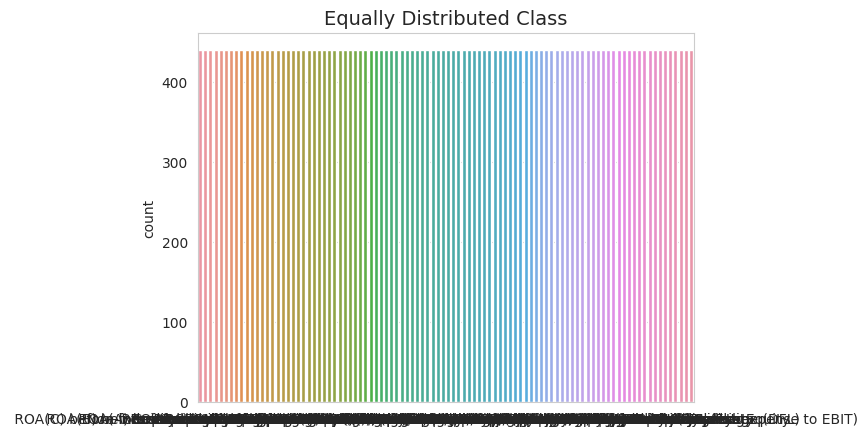

In [28]:
## Checking new dataframe

print("Distribution of the Classes in the subsample dataset")
print(nxdf['Bankrupt?'].value_counts() / len(nxdf))

sns.countplot( data = nxdf)
plt.title("Equally Distributed Class", fontsize = 14)
plt.show()

HANDLING OUTLIERS

In [29]:
pip install pandas scipy

In [30]:
from scipy.stats import zscore

In [33]:
# Calculate z-scores for all columns

z_scores = zscore(nxdf.select_dtypes(include=['number']))

# Set a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Identify outliers across all columns
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print indices or values of outliers
print("Indices of outliers:", outliers.index[outliers].tolist())
print("Values of outliers:", nxdf[outliers])

Indices of outliers: [2095, 1954, 4581, 3908, 6545, 171, 148, 1757, 174, 2470, 85, 185, 1279, 3749, 6313, 50, 3059, 236, 6362, 153, 1132, 1753, 6498, 188, 2771, 4679, 3596, 37, 1210, 34, 4918, 123, 2094, 4917, 1952, 2295, 1949, 2, 4680, 124, 96, 2099, 5228, 216, 379, 1870, 5501, 2097, 1948, 527, 1869, 2245, 175, 94, 5069, 2441, 2294, 1441, 1951, 160, 2640, 2198, 31, 138, 1950, 2001, 6641, 2496, 427, 2523, 1751, 2293, 1640, 1868, 105, 217, 2148, 2147, 4071, 149, 4492, 43, 159, 1, 3448, 1311, 2344, 3597, 1447, 73, 3595, 5500, 56, 947, 1443, 1953, 2149, 525, 1755, 1171, 221, 1861, 61, 1026, 2440, 2041, 2000, 150, 5898, 6640, 207, 60, 27, 1865, 177, 211, 3016, 1534, 2045, 1860, 168, 114, 100, 2002, 6728, 2096]
Values of outliers:       Bankrupt?   ROA(C) before interest and depreciation before interest  \
2095          1                                           0.494418          
1954          1                                           0.491201          
4581          1                  

In [34]:
#Remove outliers because they dont affect my analysis
# also i used random forest classifier which is less senstive for outliers
nxdf_cleaned = nxdf[outliers]

LOGISTIC REGRESSION

In [35]:
y = df.iloc[:,:1]
y

,Bankrupt?
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


In [36]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Flatten the y_train_resampled array
y_train_1d = np.ravel(y_train)
#multi-dimensional array y_train into a one-dimensional array

Normalization with scaller

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
MM = MinMaxScaler()

In [40]:
X_train_MM = MM.fit_transform(X_train)
#The MinMaxScaler is a preprocessing method that scales features by transforming them to a specific range.
#It is commonly used in machine learning to standardize the range of independent variables.

In [41]:
X_test_MM = MM.transform(X_test)

In [42]:
LR = LogisticRegression(max_iter=100,solver='liblinear')

In [43]:
LR.fit(X_train_MM,y_train_1d)
#fitting (training) a logistic regression model (LR) using the training data after MinMax scaling (X_train_MM)
#and the corresponding one-dimensional target variable (y_train_1d)

LogisticRegression(solver='liblinear')

In [44]:
y_hat = LR.predict(X_test_MM)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [46]:
print(accuracy_score(y_test,y_hat))

0.966275659824047


In [47]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.86      0.12      0.21        51

    accuracy                           0.97      1364
   macro avg       0.91      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364



<Axes: >

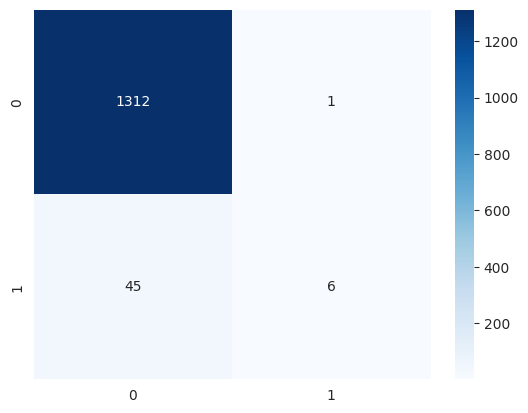

In [48]:
cm = confusion_matrix(y_test,LR.predict(X_test_MM))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

SVM(support vector machines)

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [50]:
##Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=15)

In [51]:
#Fine tune SVM parameters
for weight in [1, 3, 5, 6, 10, 50, 100]:
    #Build SVC model
    pipe_svc = Pipeline(steps=[('scale', StandardScaler()), ('SVC', SVC(class_weight={0:1, 1:weight}))])
    score = cross_val_score(pipe_svc, X_train, y_train, n_jobs=4, scoring = 'f1', cv=5).mean()
    print('Mean F1 cross-val-score for model with weight %i is %.2f' % (weight, score))

Mean F1 cross-val-score for model with weight 1 is 0.04
Mean F1 cross-val-score for model with weight 3 is 0.29
Mean F1 cross-val-score for model with weight 5 is 0.36
Mean F1 cross-val-score for model with weight 6 is 0.36
Mean F1 cross-val-score for model with weight 10 is 0.33
Mean F1 cross-val-score for model with weight 50 is 0.28
Mean F1 cross-val-score for model with weight 100 is 0.26


In [52]:
#Train and evaluate on test set
pipe_svc = Pipeline(steps=[('scale', StandardScaler()), ('SVC', SVC(class_weight={0:1, 1:6}, random_state=10))])
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
print('Test f1_score is', test_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test f1_score is 0.4324324324324324


In [53]:
test_recall =  recall_score(y_test, y_pred)
print('Test recall score is ', test_recall)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test accuarcy score is', test_accuracy)

Test recall score is  0.48484848484848486
Test accuarcy score is 0.9589442815249267


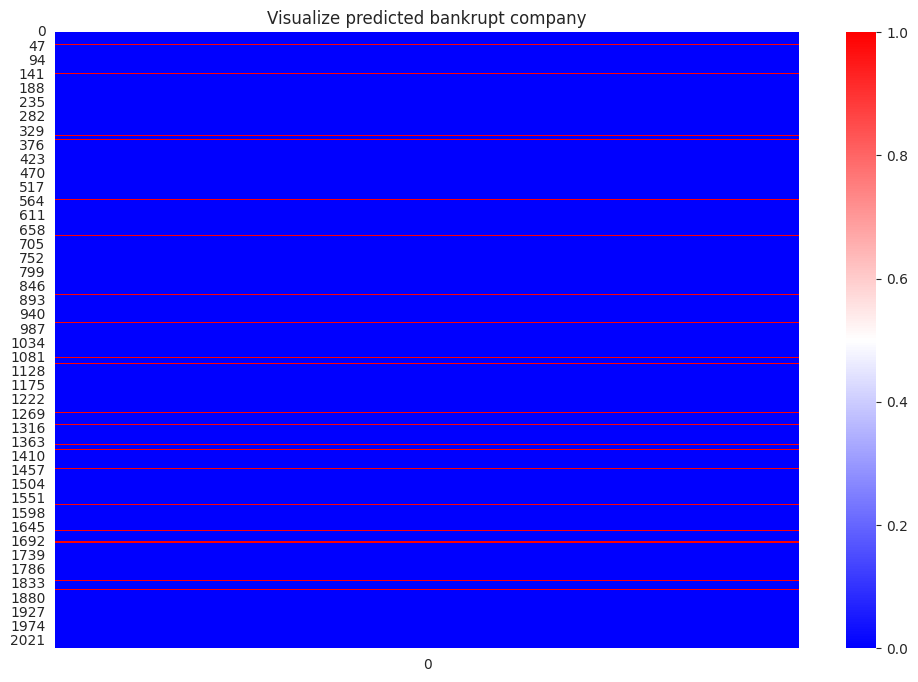

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(y_pred.reshape(2046,1), cmap='bwr')
plt.title('Visualize predicted bankrupt company')
plt.show()

In [55]:
##Memorizing support vector:
s_vector = pipe_svc[1].support_vectors_
vector_index = pipe_svc[1].support_

##Create a new column in the dataset indicate whether the sample is a support vector or not:
S_vector = []
for i in range(0, len(X_train)):
    if i in vector_index:
        S_vector.append(1)
    else:
        S_vector.append(0)
X_train['Is Vector'] = S_vector


We successfully created three models with an accuracy of 97%, using only 7 features. This not only saved a significant amount of time (reducing from 5.47 seconds to just 0.5 seconds) but also allowed us to better explain how a company might go bankrupt or not. In simpler terms, we found that companies with high interest-bearing debt interest rates, total debt to total net worth, and fixed assets turnover frequency are more likely to go bankrupt. Additionally, those with low cash to total assets and low equity to liability are also at higher risk. Moreover, companies with lower net profit before tax/paid-in capital, persistent EPS in the last four seasons, and net value per share (A) are more prone to bankruptcy.